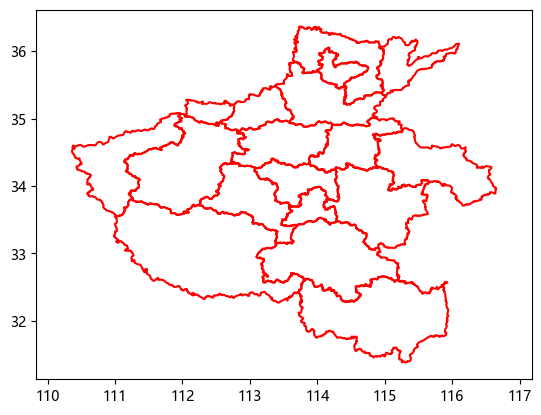

In [25]:
from osgeo import ogr
import requests
import matplotlib.pyplot as plt
import json
import tempfile
import os

# 设置字体和正负号显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 下载GeoJSON数据
url = 'https://geo.datav.aliyun.com/areas_v3/bound/410000_full.json'
r = requests.get(url)

# 保存到临时文件中
temp_file = tempfile.NamedTemporaryFile(delete=False)
temp_file.write(r.content)
temp_file.close()

# 使用ogr打开GeoJSON文件
datasource = ogr.Open(temp_file.name)
layer = datasource.GetLayer()

# 遍历图层中的每个特征
for feature in layer:
    name = feature.GetField('name')
    geom = feature.GetGeometryRef()
    if geom.GetGeometryType() == ogr.wkbPolygon or geom.GetGeometryType() == ogr.wkbMultiPolygon:
        for i in range(geom.GetGeometryCount()):
            # 对于MultiPolygon，需要额外的循环
            poly = geom.GetGeometryRef(i) if geom.GetGeometryType() == ogr.wkbMultiPolygon else geom
            ring = poly.GetGeometryRef(0)  # 获取外环
            coords = ring.GetPoints()
            x, y = zip(*coords)
            plt.plot(x, y, 'r')
            # 如果有内环（孔），这里需要额外的代码来处理它们

plt.axis('equal')
plt.show()

# 清理临时文件
# os.remove(temp_file.name)

<Axes: >

<Figure size 1000x1000 with 0 Axes>

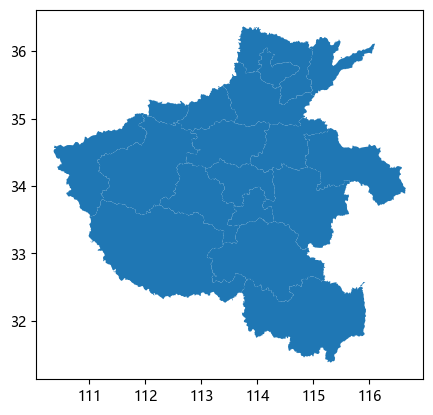

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file(r'https://geo.datav.aliyun.com/areas_v3/bound/410000_full.json')
plt.figure(figsize=(10,10))
gdf.plot()
